# **CS 351 Lab Task 1**

## Number guessing game with multiple algorithms using AI

## **Student Details:**

### Muhammad Abdullah - 2022323

### **Task 1:** Player vs Computer

Player Guesses a number selected by the program:


In [ ]:
# Player vs Computer

import random

max_attempts = 100 # maximum number of attempts allowed

attempts = 0 # number of attempts made by the player

numberguess = random.randint(1,100) # selecting a random number between 1 and 100

guess = 0

while attempts < max_attempts: # loop until the player guesses the number
    guess = int(input("Guess a number between 1 and 100: ")) # ask the player to guess a number
    attempts += 1 # increment the number of attempts

    if guess < numberguess: # check if the guess is lower than the number
        print("Too low, try again!")
    elif guess > numberguess: # check if the guess is higher than the number
        print("Too high, try again!")
    else: # the player guessed the number correctly
        print("Congratulations, you guessed the number in", attempts, "attempts!")
        break # exit the loop

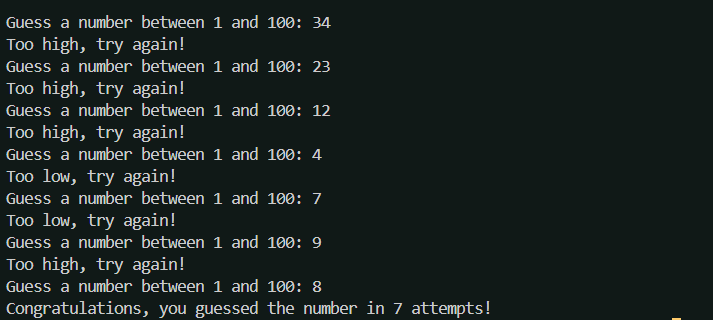

### **Task 2:** AI Binary Search

AI guesses a number selected by the user using binary search:


In [ ]:
import random

high = 100
low = 0

max_attempts = 100  # maximum number of attempts allowed
attempts = 0  # number of attempts

while attempts < max_attempts:
    guess = (low + high) // 2  # guessing the middle element (fixed)
    attempts += 1

    print(f"AI's guess is: {guess}")  # printing the guess
    inpt = input("Is this number high (h), low (l), or correct (c)? ").lower()  # improved input prompt

    if inpt == "h":  # if the number is high
        high = guess - 1  # adjust high boundary
    elif inpt == "l":  # if the number is low
        low = guess + 1  # adjust low boundary
    elif inpt == "c":  # if the number is correct
        print(f"AI found the number in {attempts} attempts!")
        break
    else:  # if the input is invalid
        print("Invalid input. Please enter 'h' for high, 'l' for low, or 'c' for correct.")

if attempts >= max_attempts:
    print("AI couldn't guess the number within the maximum attempts.")


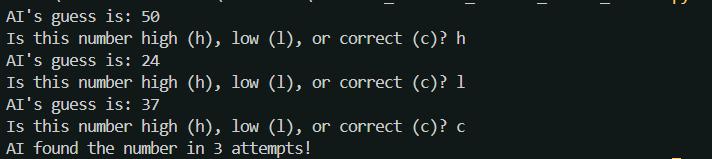

### **Task 3:** AI BFS


AI guesses a number selected by the user using breadth-first search.
The primary function of breadth-first search is to explore all the options at the current level before moving deeper. In this context, BFS will behave similarly to binary search, as it halves the range and guesses the middle element each time. The key difference from binary search is how BFS stores and processes the guesses: instead of using a single variable, BFS uses a queue, ensuring that guesses are processed in a first-in, first-out (FIFO) manner, exploring all possibilities at each level before proceeding.

This has no benefits over a binary search in this context.

In [ ]:
# AI Breadth First Search

from collections import deque

# Set the range for guessing
low, high = 0, 100

# Initialize the queue for BFS
queue = deque([(low + high) // 2])  # Start with the middle guess

max_attempts = 100
attempts = 0

while queue and attempts < max_attempts:
    guess = queue.popleft()
    attempts += 1

    print(f"AI guesses: {guess}")
    response = input("Is the number too high (h), too low (l), or correct (c)? ").lower()

    if response == "h":
        high = guess - 1
    elif response == "l":
        low = guess + 1
    elif response == "c":
        print(f"AI found your number in {attempts} attempts!")
        break
    else:
        print("Please enter 'h', 'l', or 'c'.")

    # Add the next guess to the queue
    if low <= high:
        next_guess = (low + high) // 2
        queue.append(next_guess)

if attempts >= max_attempts:
    print("AI couldn't guess the number within the maximum attempts.")


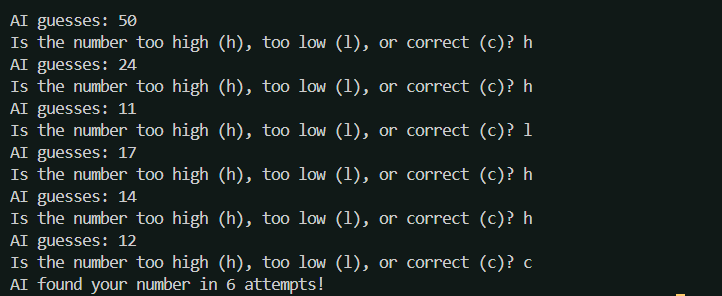

### **Task 4:** AI DFS

AI guesses a number selected by the user using depth-first search.
The primary function of depth-first search is to explore as far as possible down one path before backtracking to explore other options. In this context, DFS will act similarly to binary search because it guesses the middle-most element each time, adjusting the range based on user feedback. However, unlike binary search, which only uses a single variable, DFS stores the guesses in a stack and processes them in a last-in, first-out manner.

This has no benefits over a binary search in this context.

In [ ]:
#AI Depth First Search

# Initialize range
low, high = 0, 100

# Use a stack to store possible guesses for DFS
stack = [(low + high) // 2]  # Start guessing from the middle

max_attempts = 100
attempts = 0

while stack and attempts < max_attempts:
    guess = stack.pop()  # DFS - pop from the top of the stack
    attempts += 1

    print(f"AI guesses: {guess}")
    response = input("Is the number too high (h), too low (l), or correct (c)? ").lower()

    if response == "h":
        high = guess - 1  # Update the high boundary
    elif response == "l":
        low = guess + 1  # Update the low boundary
    elif response == "c":
        print(f"AI found your number in {attempts} attempts!")
        break
    else:
        print("Please enter 'h', 'l', or 'c'.")
        continue  # Skip adding new guesses if the input is invalid

    # Add the next guess to the stack if the range is valid
    if low <= high:
        next_guess = (low + high) // 2
        stack.append(next_guess)  # Add to the stack for DFS

if attempts >= max_attempts:
    print("AI couldn't guess the number within the maximum attempts.")


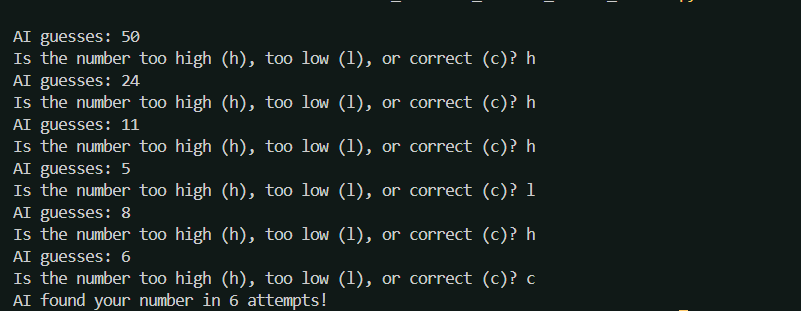

### **Task 5:** AI Ternary Search


AI guesses a number selected by the user using ternary search.
The primary function of ternary search is to divide the search range into three parts rather than two, as in binary search. In this context, the AI selects two middle points, splitting the range into thirds, and then narrows the search based on feedback. The key advantage of ternary search over binary search is that it can potentially reduce the number of guesses by exploring more sections of the range at once. This makes it more efficient when dealing with larger datasets, although the difference is less noticeable in small ranges like the number guessing game. Ternary search is particularly beneficial when minimizing comparisons is crucial.

In [ ]:
# AI Ternary Search

# Function to perform Ternary Search
def ternary_search(low, high):
    # Perform Ternary Search within the range [low, high]
    attempts_local = 0
    while low <= high:
        attempts_local += 1

        # Divide the range into three parts
        third = (high - low) // 3
        mid1 = low + third
        mid2 = high - third

        # Print guesses
        print(f"AI guesses: {mid1} and {mid2}")

        # Get feedback for mid1
        response1 = input(f"Is the number {mid1} too high (h), too low (l), or correct (c)? ").lower()
        if response1 == 'c':
            return mid1, attempts_local
        elif response1 == 'l':
            low = mid1 + 1
        elif response1 == 'h':
            high = mid1 - 1
        else:
            print("Invalid input. Please enter 'h', 'l', or 'c'.")
            continue  # Skip further processing and ask again

        # Get feedback for mid2
        response2 = input(f"Is the number {mid2} too high (h), too low (l), or correct (c)? ").lower()
        if response2 == 'c':
            return mid2, attempts_local
        elif response2 == 'l':
            low = mid2 + 1
        elif response2 == 'h':
            high = mid2 - 1
        else:
            print("Invalid input. Please enter 'h', 'l', or 'c'.")
            continue  # Skip further processing and ask again

    # If the target was not found
    return None, attempts_local

# Initialize the range for guessing
low, high = 0, 100

# Maximum number of attempts allowed
max_attempts = 100
total_attempts = 0

# Perform Ternary Search
while total_attempts < max_attempts:
    result, attempts_local = ternary_search(low, high)
    total_attempts += attempts_local

    if result is not None:
        print(f"AI found the number: {result} in {total_attempts} attempts!")
        break

if total_attempts >= max_attempts:
    print("AI couldn't guess the number within the maximum attempts.")


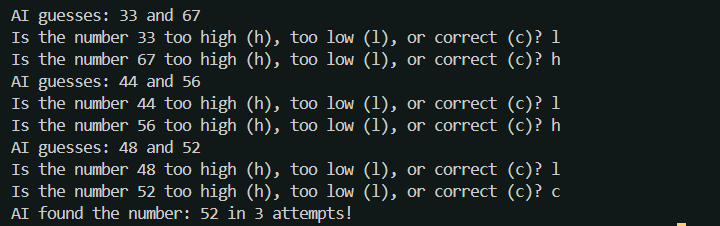